In [85]:
%matplotlib inline
import pandas as pd

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
#Import csv
acq = pd.DataFrame.from_csv('/Users/jessica/Documents/Data Story/crunchbase_acquisitions.csv', index_col=None)
acq.head()

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,...,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/organization/magnify,Waywire,...,USA,NY,New York City,New York,2013-10-17 00:00:00,2013-10,2013-Q4,2013.0,NaN,USD
1,/organization/fluff-friends,(fluff)Friends,NaN,NaN,NaN,NaN,NaN,NaN,/organization/social-gaming-network,SGN (Social Gaming Network),...,USA,CA,Los Angeles,Beverly Hills,2008-09-16 00:00:00,2008-09,2008-Q3,2008.0,NaN,USD
2,/organization/red,(RED),|Nonprofits|,Nonprofits,USA,NY,New York City,New York,/organization/nationstar-mortgage-holdings,Nationstar Mortgage Holdings,...,USA,TX,Dallas,Lewisville,2014-05-08 00:00:00,2014-05,2014-Q2,2014.0,"18,000,000",USD
3,/organization/co-internet,.CO,|Registrars|Domains|Curated Web|,Registrars,USA,FL,Miami,Miami,/organization/neustar,Neustar,...,USA,VA,Sterling,Sterling,2014-03-20 00:00:00,2014-03,2014-Q1,2014.0,"109,000,000",USD
4,/organization/vantronix,.vantronix,|Cloud Security|Network Security|Security|,Cloud Security,DEU,NaN,Hanover,Hanover,/organization/compumatica,Compumatica,...,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,2011-01,2011-Q1,2011.0,NaN,USD


In [88]:
#Create a column that shows combinations of acquirer market and acquiree market to see the most common combinations
acq['combo']=acq.acquirer_market+" acquires "+acq.company_market
acq_counts_top10 = acq.combo.value_counts().head(10)
acq_counts_top10

Software acquires Software                          500
Biotechnology acquires Biotechnology                294
Enterprise Software acquires Software               140
Software acquires Enterprise Software               119
Curated Web acquires Curated Web                     99
Semiconductors acquires Semiconductors               98
Software acquires Curated Web                        89
Games acquires Games                                 80
Advertising acquires Advertising                     77
Enterprise Software acquires Enterprise Software     65
Name: combo, dtype: int64

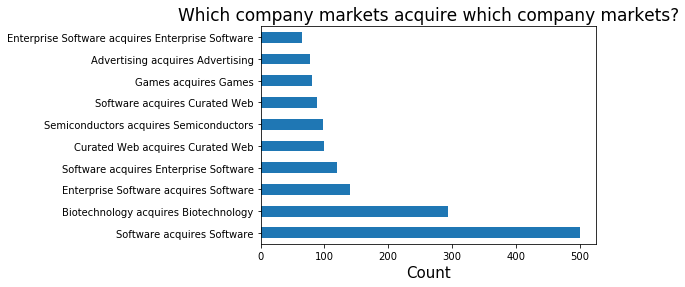

In [89]:
#Plot most common combinations
plot1 = acq_counts_top10.plot(kind='barh')
plot1.set_title("Which company markets acquire which company markets?",fontsize=17)
plot1.set_xlabel("Count",fontsize=15)

#Insight: the most common combination is software acquiring software. Enterprise software acquires software more often than vice versa, which is intuitive

In [112]:
#Create a series for each row that says whether or not the acquiring company and acquiree are the same market or different
#The series method
acquirer_market = list(acq.acquirer_market)
company_market = list(acq.company_market)
comparison = []
for company in range(len(acq.acquirer_market)):
    if acquirer_market[company] == company_market[company]:
        comparison.append('same')
    else: 
        comparison.append('different')
#Answer the question, for which markets was the highest percentage of in-market acquisitions (company same market as acquiror)
acq['compare_markets']=comparison
market_comp = acq.groupby(['acquirer_market','compare_markets']).size()
un = market_comp.unstack().fillna(0)
df_market_comp = un['same']/(un['different']+un['same'])
df_market_comp.sort_values(ascending=False).head(10)

#Insight: for acquisitions in the digital signage, nutrition, craft beer, and incentives markets, 100% of acqusitions were in-market

acquirer_market
Digital Signage    1.000000
Nutrition          1.000000
Craft Beer         1.000000
Incentives         1.000000
Cosmetics          0.666667
Biotechnology      0.609959
Agriculture        0.600000
Food Processing    0.555556
Tablets            0.500000
Nanotechnology     0.500000
dtype: float64

In [118]:
#Now answering the same as the previous question with the dataframe method
acq['comparison_dfmethod'] = 'different'
acq.loc[acq.acquirer_market==acq.company_market,'comparison_dfmethod'] = 'same'
market_comp2 = acq.groupby(['acquirer_market','comparison_dfmethod']).size()
un2 = market_comp2.unstack().fillna(0)
df_market_comp2 = un2['same']/(un2['different']+un['same'])
df_market_comp2.sort_values(ascending=False).head(10)
#Same answer

acquirer_market
Digital Signage    1.000000
Nutrition          1.000000
Craft Beer         1.000000
Incentives         1.000000
Cosmetics          0.666667
Biotechnology      0.609959
Agriculture        0.600000
Food Processing    0.555556
Tablets            0.500000
Nanotechnology     0.500000
dtype: float64

SF Bay Area acquires SF Bay Area        830
New York City acquires New York City    147
New York City acquires SF Bay Area       99
SF Bay Area acquires New York City       91
SF Bay Area acquires Boston              81
Name: region_to_region, dtype: int64

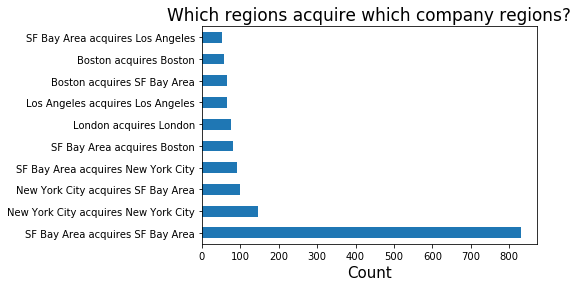

In [124]:
#Which regions acquire which regions most frequently?
#Create a column that shows combinations of acquirer region and acquiree region to see the most common combinations
acq['region_to_region']=acq.acquirer_region+" acquires "+acq.company_region
acq_region_counts = acq.region_to_region.value_counts()
plot2 = acq_region_counts.head(10).plot(kind='barh')
plot2.set_title("Which regions acquire which company regions?",fontsize=17)
plot2.set_xlabel("Count",fontsize=15)
acq_region_counts.head()

#Insights: SF acquires SF companies over 5X as frequently as NYC acquires NYC companies. NYC acquires SF companies slightly more often than SF acquires NYC companies (+8.8% higher count)

In [142]:
#What is the year over year progression of SF to SF acquisitions and NYC to NYC acquisitions?
acq_limited=acq[(acq.region_to_region=='SF Bay Area acquires SF Bay Area')|(acq.region_to_region=='New York City acquires New York City')]
acq_series = acq_limited.groupby(['region_to_region','acquired_year']).size()
acq_yoy = acq_series.unstack().fillna(0)
acq_yoy

acquired_year,1986.0,1991.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,...,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
region_to_region,,,,,,,,,,,,,,,,,,,,,
New York City acquires New York City,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,4.0,10.0,5.0,14.0,19.0,21.0,24.0,28.0,13.0
SF Bay Area acquires SF Bay Area,0.0,1.0,0.0,1.0,2.0,2.0,3.0,2.0,6.0,7.0,...,15.0,19.0,60.0,52.0,76.0,96.0,115.0,102.0,141.0,100.0


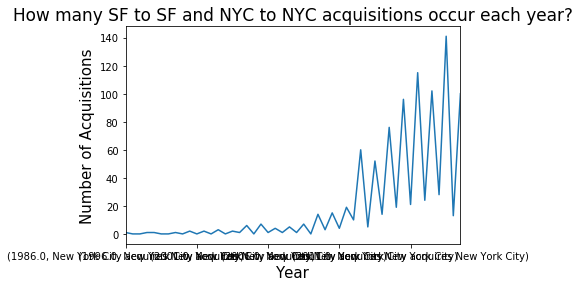

In [184]:
#Plot-- I can't figure out how to make SF and NYC separate series and lines. Hard to tell what is being plotted here..
plot3 = acq_un = acq_yoy.unstack().plot(kind='line')
plot3.set_title("How many SF to SF and NYC to NYC acquisitions occur each year?",fontsize=17)
plot3.set_xlabel("Year",fontsize=15)
plot3.set_ylabel("Number of Acquisitions",fontsize=15)